## แบบฝึกหัดที่ 7

ให้นิสิตแสดงการสร้างและทดสอบประสิทธิภาพโมเดล KNN โดยใช้ชุดข้อมูล "Wholesale_customers_data.csv" ซึ่งมีรายละเอียดดังนี้:

**Attribute Information:**  
  
1) Fresh: annual spending (m.u.) on fresh products (Continuous);  
2) Milk: annual spending (m.u.) on milk products (Continuous);  
3) Grocery: annual spending (m.u.)on grocery products (Continuous);  
4) Frozen: annual spending (m.u.)on frozen products (Continuous)  
5) Detergents_paper: annual spending (m.u.) on detergents and paper products (Continuous)  
6) Delicassen: annual spending (m.u.)on and delicatessen products (Continuous);  
7) Channel<sup>*</sup>: customers channel - 1:Horeca (Hotel/Restaurant/Cafe) or 2:Retail channel (Nominal)  
8) Region: customers region - Lisnon, Oporto or Other (Nominal)

<sup>*</sup>Outcome/label variable  
monetary units = m.u.

โมเดลที่สร้างมีเป้าหมายเพื่อการทำนายตัวแปร Channel  
นิสิตจะต้องแบ่งชุดข้อมูลออกเป็นส่วนที่ใช้ในการ training และ test และแสดงการปรับข้อมูล พร้อมทั้งทดสอบประสิทธิภาพของโมเดลตามที่ได้อธิบายในบทเรียน  
โดยในส่วนการแบ่งข้อมูล train_test_split ให้ใช้ argument random_state=1234

&nbsp;   
#### <font color="color:#1f7d02">*Read Dataset*</font>

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn import metrics

In [133]:
df = pd.read_csv("https://raw.githubusercontent.com/ThammakornS/ProgStat/main/dataset/Wholesale_customers_data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [134]:
df.Channel.value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

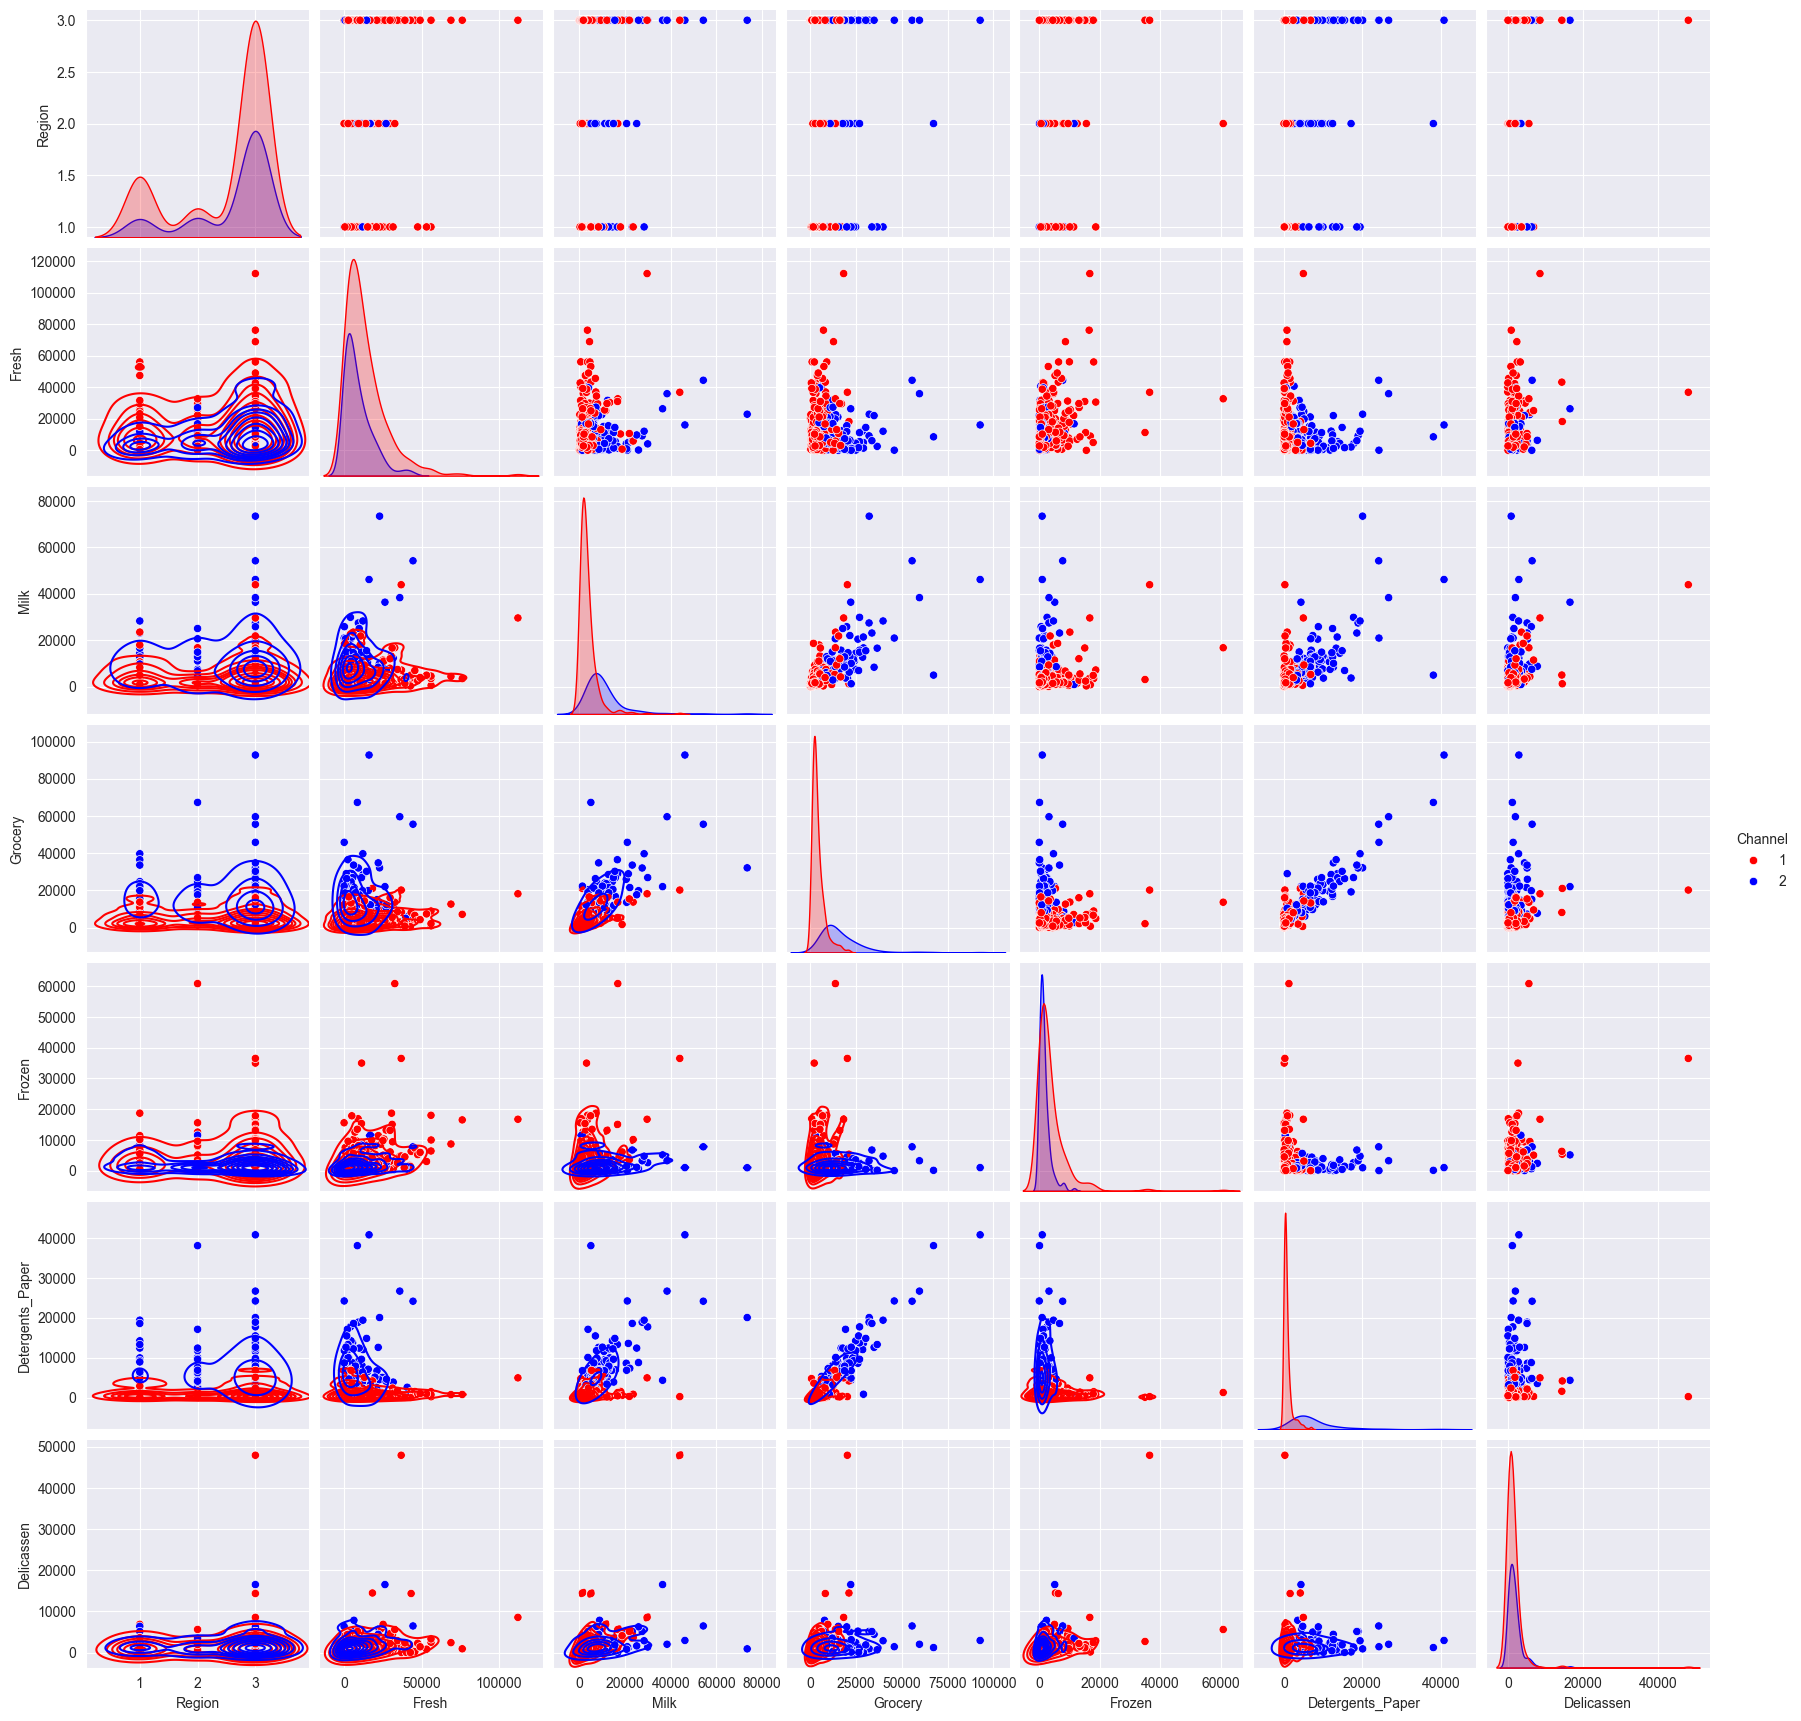

In [135]:
g = sns.pairplot(data=df, hue='Channel', palette = {1:'r', 2:'b'})
g.map_lower(sns.kdeplot)

In [136]:
corr = df.corr()
corr

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


<Axes: >

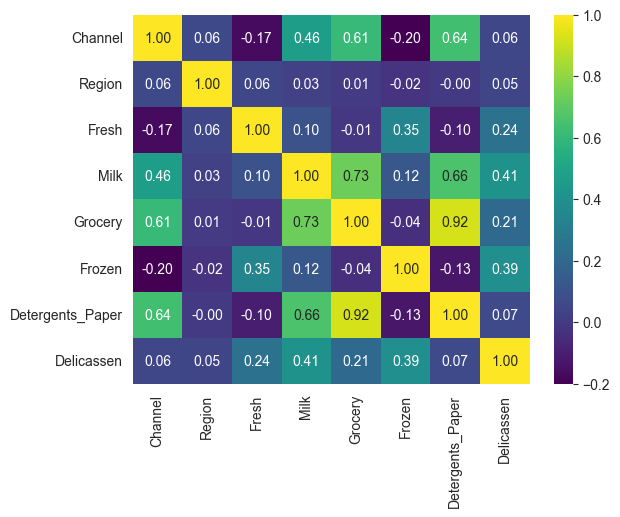

In [137]:
sns.heatmap(corr, cmap='viridis', annot=True, fmt=".2f")

&nbsp;   
#### <font color="color:#1f7d02">*Create feature and label data*</font>

In [138]:
# Your code
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [139]:
X = df.loc[:,~(df.columns=='Channel')]
X

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,3,29703,12051,16027,13135,182,2204
436,3,39228,1431,764,4510,93,2346
437,3,14531,15488,30243,437,14841,1867
438,3,10290,1981,2232,1038,168,2125


In [140]:
y = df['Channel']
y

0      2
1      2
2      2
3      1
4      2
      ..
435    1
436    1
437    2
438    1
439    1
Name: Channel, Length: 440, dtype: int64

In [141]:
y.value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

&nbsp;   
#### <font color="color:#1f7d02">*Train Test Split*</font>

In [142]:
# Your code (use random_state=1234)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1234)

In [143]:
X_train.shape

(308, 7)

In [144]:
X_test.shape

(132, 7)

In [145]:
y_train.value_counts()

Channel
1    211
2     97
Name: count, dtype: int64

In [146]:
y_test.value_counts()

Channel
1    87
2    45
Name: count, dtype: int64

In [147]:
x_label = 'Fresh'
y_label = 'Frozen'

<Axes: xlabel='Fresh', ylabel='Frozen'>

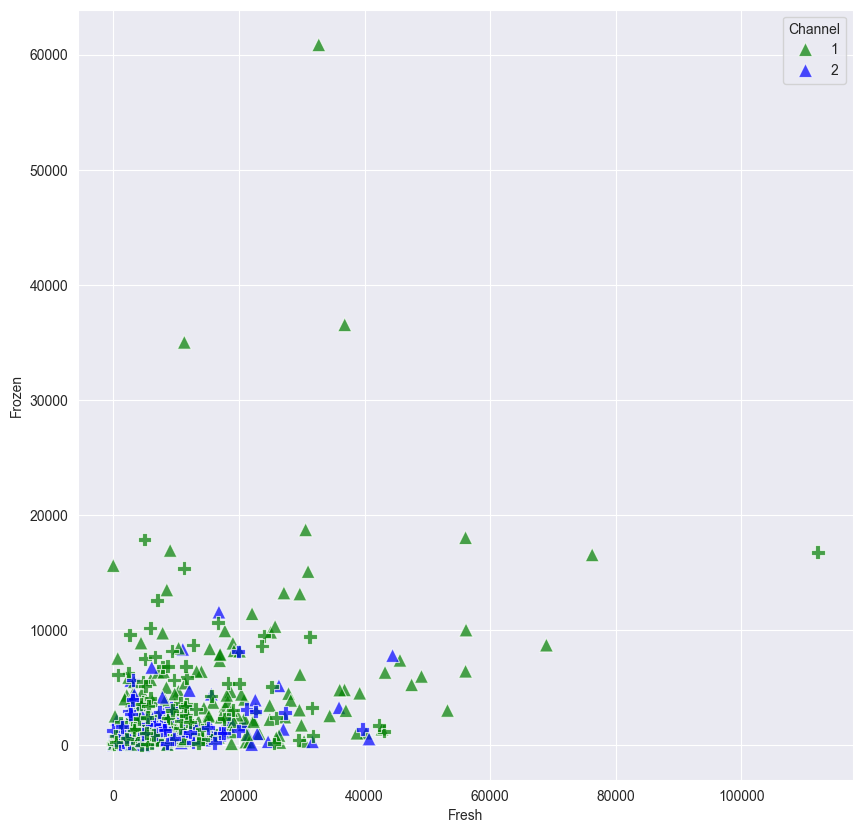

In [148]:
fig, ax = plt.subplots(figsize=(10, 10))

#Training set: triangle
sns.scatterplot(data=X_train,
                x=x_label,
                y=y_label,
                hue=y_train,
                palette=["g", "b"],
                marker= '^',
                s=100,
                alpha=.7,
                ax=ax)

#Test set: plus
sns.scatterplot(data=X_test,
                x=x_label,
                y=y_label,
                hue=y_test,
                palette=["g", "b"],
                marker= 'P',
                alpha=.7,
                s=100,
                legend=False,
                ax=ax)

&nbsp;   
#### <font color="color:#1f7d02">*Feature Data Scaling*</font>

In [149]:
# Your code
df.std(numeric_only=True)

Channel                 0.468052
Region                  0.774272
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicassen           2820.105937
dtype: float64

In [150]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) #Scaling parameters must based on training data.

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [151]:
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)
X_train_sc

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.575392,1.364011,-0.148320,-0.056806,0.564216,-0.522341,-0.141749
1,-2.011771,-0.749054,0.020928,0.611568,-0.538678,1.235869,0.401395
2,0.575392,1.173838,-0.561172,-0.602357,-0.126308,-0.554543,-0.061922
3,-2.011771,-0.770607,-0.427802,-0.265837,0.467385,-0.434758,-0.053301
4,0.575392,-0.428533,-0.615237,-0.498196,-0.431006,-0.523571,-0.122910
...,...,...,...,...,...,...,...
303,-2.011771,-0.836692,-0.630207,-0.269793,-0.323146,-0.595360,-0.063519
304,0.575392,-0.952777,0.555272,0.369777,-0.442595,0.554491,-0.416036
305,-0.718190,0.693967,-0.491394,-0.135510,-0.411752,-0.430041,0.104438
306,-2.011771,-0.031387,2.764035,3.226035,0.303634,3.384816,0.428856


In [152]:
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)
X_test_sc.std(numeric_only=True)

Region              1.004357
Fresh               1.000729
Milk                0.662259
Grocery             0.872723
Frozen              0.638917
Detergents_Paper    0.923875
Delicassen          0.605150
dtype: float64

&nbsp;   
#### <font color="color:#1f7d02">*Training, perform prediction, and optimize K*</font>

In [153]:
# Your code
from sklearn.neighbors import KNeighborsClassifier as knn
model = knn(n_neighbors=3) # n_neighbors = value for K-neighbors
model.fit(X_train_sc, y_train)

KNeighborsClassifier(n_neighbors=3)

In [154]:
y_pred = model.predict(X_test_sc)
y_pred

array([1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2,
       2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1],
      dtype=int64)

In [155]:
X_simu = {}

def simulate_data(col):
    X_simu[col] = []
    max_data = max(max(X_train_sc[col]), max(X_test_sc[col]))
    min_data = min(min(X_train_sc[col]), min(X_test_sc[col]))
    simu_data = np.linspace(min_data, max_data, 100)
    for s in simu_data:
        X_simu[col].append(s)

simulate_data('Region')
simulate_data('Fresh')
simulate_data('Milk')
simulate_data('Grocery')
simulate_data('Frozen')
simulate_data('Detergents_Paper')
simulate_data('Delicassen')

X_simu = pd.DataFrame(X_simu)
X_simu

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-2.011771,-0.991446,-0.733636,-0.799522,-0.576999,-0.595770,-0.486603
1,-1.985638,-0.901684,-0.641855,-0.704475,-0.462113,-0.511190,-0.331980
2,-1.959505,-0.811921,-0.550074,-0.609428,-0.347228,-0.426610,-0.177357
3,-1.933372,-0.722158,-0.458293,-0.514381,-0.232343,-0.342030,-0.022734
4,-1.907239,-0.632396,-0.366512,-0.419334,-0.117458,-0.257449,0.131889
...,...,...,...,...,...,...,...
95,0.470860,7.535995,7.985564,8.229958,10.337098,7.439354,14.202578
96,0.496993,7.625757,8.077345,8.325005,10.451983,7.523934,14.357201
97,0.523126,7.715520,8.169126,8.420052,10.566868,7.608514,14.511824
98,0.549259,7.805282,8.260907,8.515099,10.681753,7.693095,14.666447


In [156]:
y_pred_simu = model.predict(X_simu)

Text(0.5, 1.0, "'o' for correct prediction, 'x' for incorrect prediction")

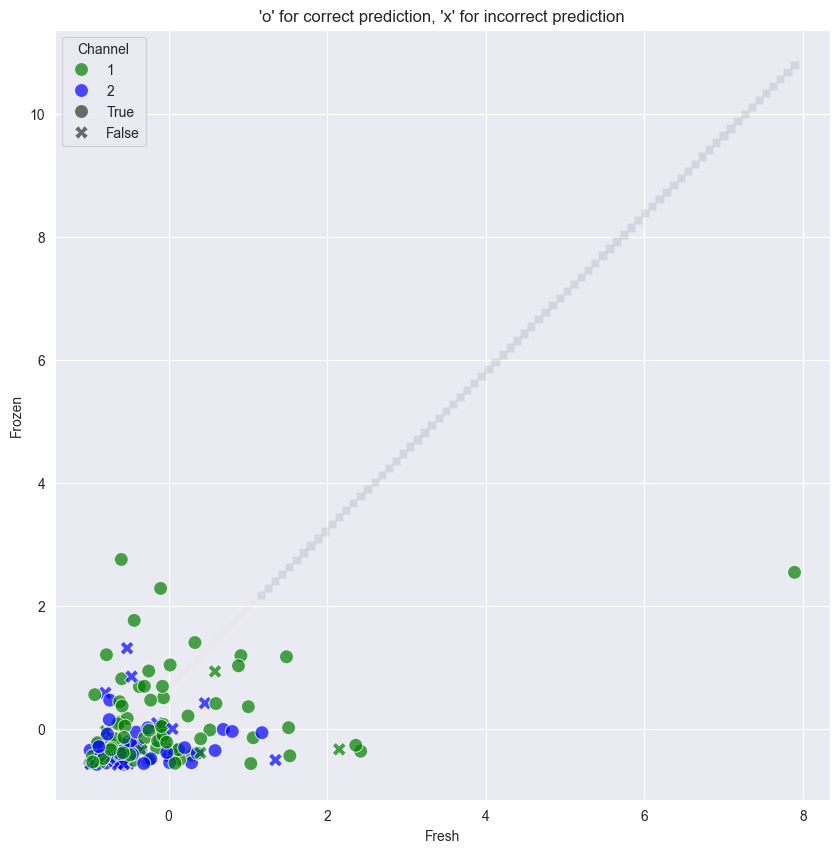

In [157]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=X_simu,
                x='Fresh',
                y='Frozen',
                hue=y_pred_simu,
                marker= 's',
                legend=False,
                alpha=.1,
                ax=ax)

correct_pred = (y_pred==y_test)

sns.scatterplot(data=X_test_sc,
                x='Fresh',
                y='Frozen',
                hue=y_pred,
                palette=["g", "b"],
                style=correct_pred.reset_index(drop=True),
                style_order=[True, False],
                s=100,
                alpha=.7,
                ax=ax)
plt.title("'o' for correct prediction, 'x' for incorrect prediction")

&nbsp;   
#### <font color="color:#1f7d02">*Plot performance scores at different K*</font>

In [158]:
# Your code
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_test, y_pred, labels=[1,2])
print(conf_mat)

[[74 13]
 [ 7 38]]


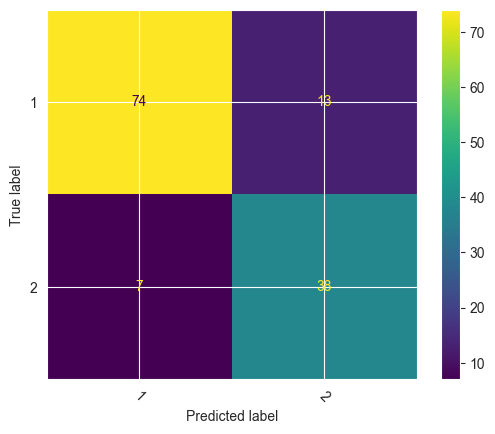

In [159]:
(metrics.ConfusionMatrixDisplay(conf_mat,
                               display_labels=['1','2'])
 .plot(xticks_rotation=-45))

In [160]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.91      0.85      0.88        87
           2       0.75      0.84      0.79        45

    accuracy                           0.85       132
   macro avg       0.83      0.85      0.84       132
weighted avg       0.86      0.85      0.85       132



In [161]:
Ks = np.arange(1,31,1)

scores = {}
scores['K'] = []
scores['accuracy'] = []
scores['precision_w'] = []
scores['recall_w'] = []
scores['f1_w'] = []

for k in Ks:
    model = knn(n_neighbors=k) # n_neighbors = value for K-neighbors
    model.fit(X_train_sc, y_train)
    y_pred = model.predict(X_test_sc)
    scores['K'].append(k)
    scores['accuracy'].append(metrics.accuracy_score(y_test, y_pred))
    scores['precision_w'].append(metrics.precision_score(y_test, y_pred, average='weighted'))
    scores['recall_w'].append(metrics.recall_score(y_test, y_pred, average='weighted'))
    scores['f1_w'].append(metrics.f1_score(y_test, y_pred, average='weighted'))

scores = pd.DataFrame(scores)
scores.sort_values(by='accuracy', ascending=False).head(10)

df_forPlot = pd.melt(scores,
                     value_vars = ['accuracy', 'precision_w', 'recall_w', 'f1_w'],
                     id_vars = ['K'],
                     var_name = 'Metric',
                     value_name = 'Score')
df_forPlot.head()

,K,Metric,Score
0,1,accuracy,0.833333
1,2,accuracy,0.840909
2,3,accuracy,0.848485
3,4,accuracy,0.878788
4,5,accuracy,0.878788


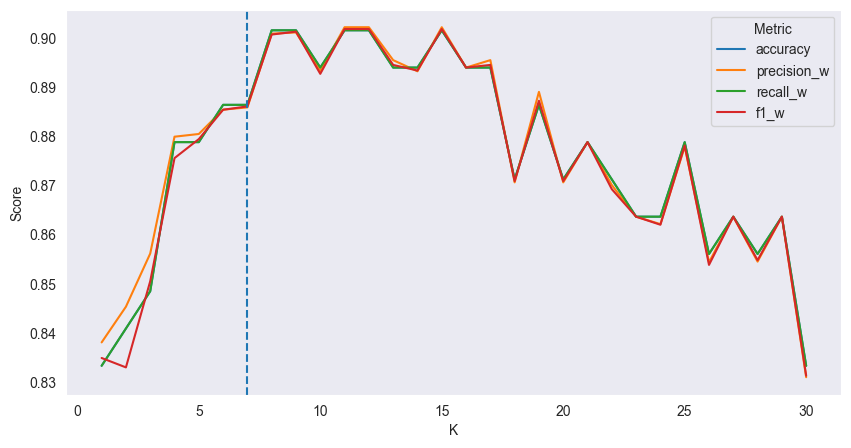

In [162]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df_forPlot,
             x = 'K',
             y = 'Score',
             hue = 'Metric',
             ax=ax)
plt.grid()
plt.axvline(x=7, ls="--")

&nbsp;   
#### <font color="color:#1f7d02">*Confusion matrix of test set when using the best K*</font>

In [163]:
# Your code
def get_y_pred_simu(k_neighbors):
    model = knn(n_neighbors=k_neighbors)
    model.fit(X_train_sc, y_train)
    return model.predict(X_simu)

def plt_pred_simu(title):
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.scatterplot(data=X_simu,
                x=x_label,
                y=y_label,
                hue=y_pred_simu,
                marker= 's',
                alpha=.1,
                legend=False,
                ax=ax)

    sns.scatterplot(data=X_train_sc,
                    x=x_label,
                    y=y_label,
                    hue=y_train.reset_index(drop=True),
                    marker= '^',
                    s=50,
                    alpha=.5,
                    legend=False,
                    ax=ax)

    y_pred = model.predict(X_test_sc)
    correct = (y_pred==y_test)

    sns.scatterplot(data=X_test_sc,
                    x=x_label,
                    y=y_label,
                    hue=y_pred,
                    style=correct.reset_index(drop=True),
                    style_order=[True, False],
                    palette=["g", "b"],
                    s=100,
                    alpha=.7,
                    ax=ax)
    plt.title(title)

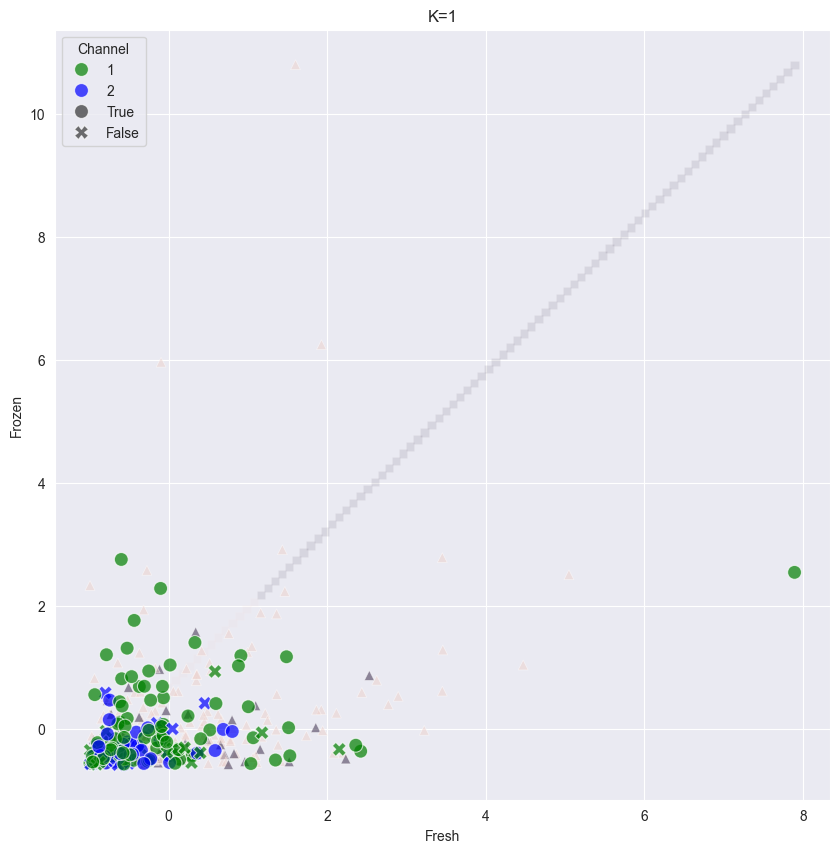

In [164]:
y_pred_simu_k1 = get_y_pred_simu(1)
plt_pred_simu("K=1")

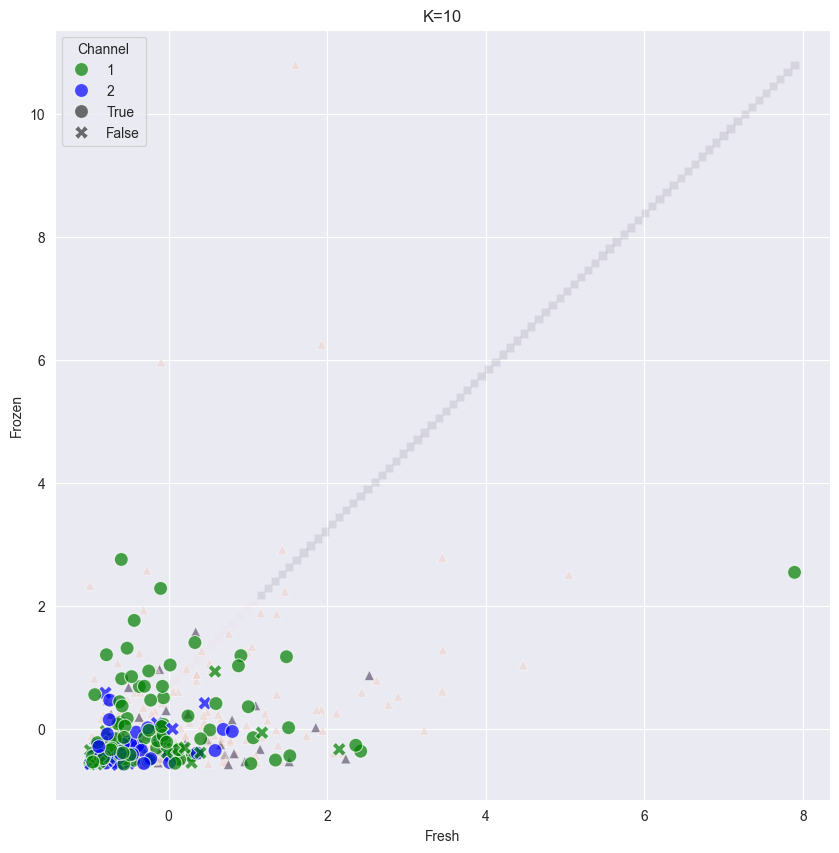

In [165]:
y_pred_simu_k10 = get_y_pred_simu(10)
plt_pred_simu("K=10")

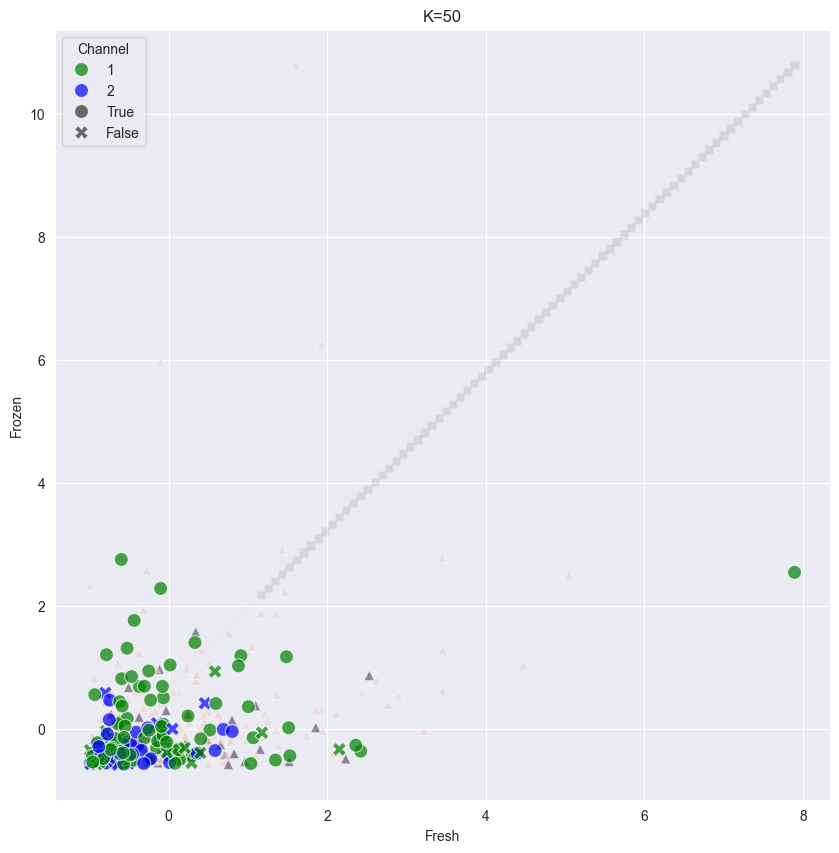

In [166]:
y_pred_simu_k50 = get_y_pred_simu(50)
plt_pred_simu("K=50")

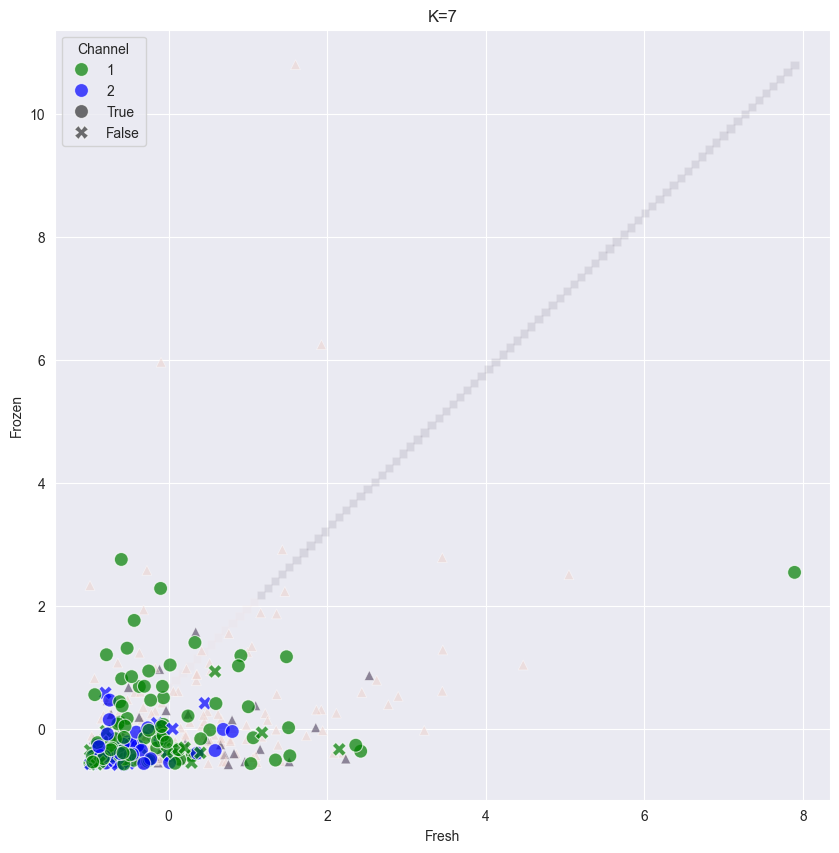

In [167]:
y_pred_simu_k7 = get_y_pred_simu(7)
plt_pred_simu("K=7")